# **P4/ Anticipez les besoins en consommation de bâtiments**

## **Introduction**

In [72]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [74]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

In [77]:
# Chargement + affichage de la base de données
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
data.head(100)

OSEBuildingID  DataYear          BuildingType  \
0               1      2016        NonResidential   
1               2      2016        NonResidential   
2               3      2016        NonResidential   
3               5      2016        NonResidential   
4               8      2016        NonResidential   
5               9      2016    Nonresidential COS   
6              10      2016        NonResidential   
7              11      2016        NonResidential   
8              12      2016        NonResidential   
9              13      2016  Multifamily MR (5-9)   
10             15      2016        NonResidential   
11             16      2016        NonResidential   
12             17      2016        NonResidential   
13             18      2016        NonResidential   
14             19      2016        NonResidential   
15             21      2016    Nonresidential COS   
16             22      2016        NonResidential   
17             23      2016        NonResidential   
18             24      2016        NonResidential   
19             25      2016        NonResidential   
20             26      2016        NonResidential   
21             27      2016        NonResidential   
22             28      2016     SPS-District K-12   
23             29      2016        NonResidential   
24             30      2016        NonResidential   
25             31      2016        NonResidential   
26             32      2016        NonResidential   
27             33      2016        NonResidential   
28             34      2016     SPS-District K-12   
29             35      2016        NonResidential   
30             36      2016     SPS-District K-12   
31             37      2016     SPS-District K-12   
32             38      2016        NonResidential   
33             40      2016        NonResidential   
34             41      2016        NonResidential   
35             43      2016                Campus   
36             46      2016        NonResidential   
37             50      2016     SPS-District K-12   
38             51      2016     SPS-District K-12   
39             52      2016        NonResidential   
40             53      2016        NonResidential   
41             54      2016        NonResidential   
42             55      2016        NonResidential   
43             56      2016        NonResidential   
44             57      2016        NonResidential   
45             58      2016        NonResidential   
46             59      2016        NonResidential   
47             60      2016        NonResidential   
48             62      2016        NonResidential   
49             63      2016        NonResidential   
50             65      2016        NonResidential   
51             66      2016        NonResidential   
52             67      2016        NonResidential   
53             68      2016        NonResidential   
54             69      2016        NonResidential   
55             70      2016        NonResidential   
56             73      2016        NonResidential   
57             77      2016        NonResidential   
58             82      2016        NonResidential   
59             84      2016        NonResidential   
60             85      2016        NonResidential   
61             86      2016        NonResidential   
62             87      2016     SPS-District K-12   
63             89      2016        NonResidential   
64             95      2016        NonResidential   
65             96      2016        NonResidential   
66             98      2016        NonResidential   
67            100      2016        NonResidential   
68            102      2016        NonResidential   
69            103      2016    Nonresidential COS   
70            104      2016    Nonresidential COS   
71            106      2016    Nonresidential COS   
72            107      2016        NonResidential   
73            110      2016    Nonresidential COS   
74            111      2016  

In [78]:
data.shape

(3376, 46)

In [79]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [85]:
data.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3376.000000      3.376000e+03         3376.000000   
mean         4.709123      9.483354e+04         8001.526066   
std          5.494465      2.188376e+05        32326.723928   
min          0.000000      1.128500e+04            0.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.417500e+04            0.000000   
75%          5.000000      9.099200e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            3.376000e+03               3.356000e+03   
mean             8.683201e+04               7.917764e+04   
std              2.079398e+05               2.017034e+05   
min              3.636000e+03               5.656000e+03   
25%              2.775600e+04               2.509475e+04   
50%              4.321600e+04               3.989400e+04   
75%              8.427625e+04               7.620025e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1679.000000                      596.000000   
mean                      28444.075817                    11738.675166   
std                       54392.917928                    29331.199286   
min                           0.000000                        0.000000   
25%                        5000.000000                     2239.000000   
50%                       10664.000000                     5043.000000   
75%                       26640.000000                    10138.750000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232848            137.783932         5.403667e+06   
std            139.287554            139.109807         2.161063e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05

In [87]:
data['BuildingType'].value_counts()

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

In [89]:
# Exclusion des lignes contenant "Multifamily" dans BuildingType
data_no_resi = data[~data['BuildingType'].str.contains('Multifamily|Campus', na=False)]
data_no_resi.shape

(1644, 46)

In [91]:
data_no_resi['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant                       1524
Error - Correct Default Data      88
Non-Compliant                     18
Missing Data                      14
Name: count, dtype: int64

In [93]:
data_no_resi['Outlier'].value_counts()

Outlier
Low outlier     15
High outlier     2
Name: count, dtype: int64

In [95]:
data_no_outliers = data_no_resi[~data_no_resi['Outlier'].isin(['Low outlier', 'High outlier'])]

In [97]:
data_no_outliers.shape

(1627, 46)

In [99]:
data_compliant = data_no_outliers[data_no_outliers['ComplianceStatus'] == 'Compliant']

In [101]:
data_compliant.shape

(1524, 46)

In [103]:
data_compliant.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              13
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                4
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        693
SecondLargestPropertyUseTypeGFA     693


In [105]:
# Suppresion des colonnes inintéressantes
data_compliant = data_compliant.drop(columns=['OSEBuildingID',
        'CouncilDistrictCode',
        'DataYear',
        'City',
        'State', 
        'PropertyName', 
        'TaxParcelIdentificationNumber',
        #'Latitude',
        #'Longitude',
        'ListOfAllPropertyUseTypes',
        'DefaultData',
        'Address', 
        'ZipCode',
        'YearsENERGYSTARCertified',

])

'OsebuildingID' représente les indices et par conséquent peu utile. 'City' et 'State' ne possèdent qu'une valeur unique ce qui les rendent peu intéressant à analyser. 'PropertyName' et 'TaxParcelIdentificationNumber' non pertinent pour l'analyse énergétique. 'ListOfAllPropertyUseTypes' déja présente dans d'autres features. 'DefaultData', 'Address' peu utile. 'ZipCode' non necessaire puisque l'on conserve Latitude et Longitude. 

In [107]:
colonnes_a_supprimer = ['Comments', 'Outlier', 'ComplianceStatus']
data_compliant = data_compliant.drop(columns=colonnes_a_supprimer)
data_compliant.shape

(1524, 31)

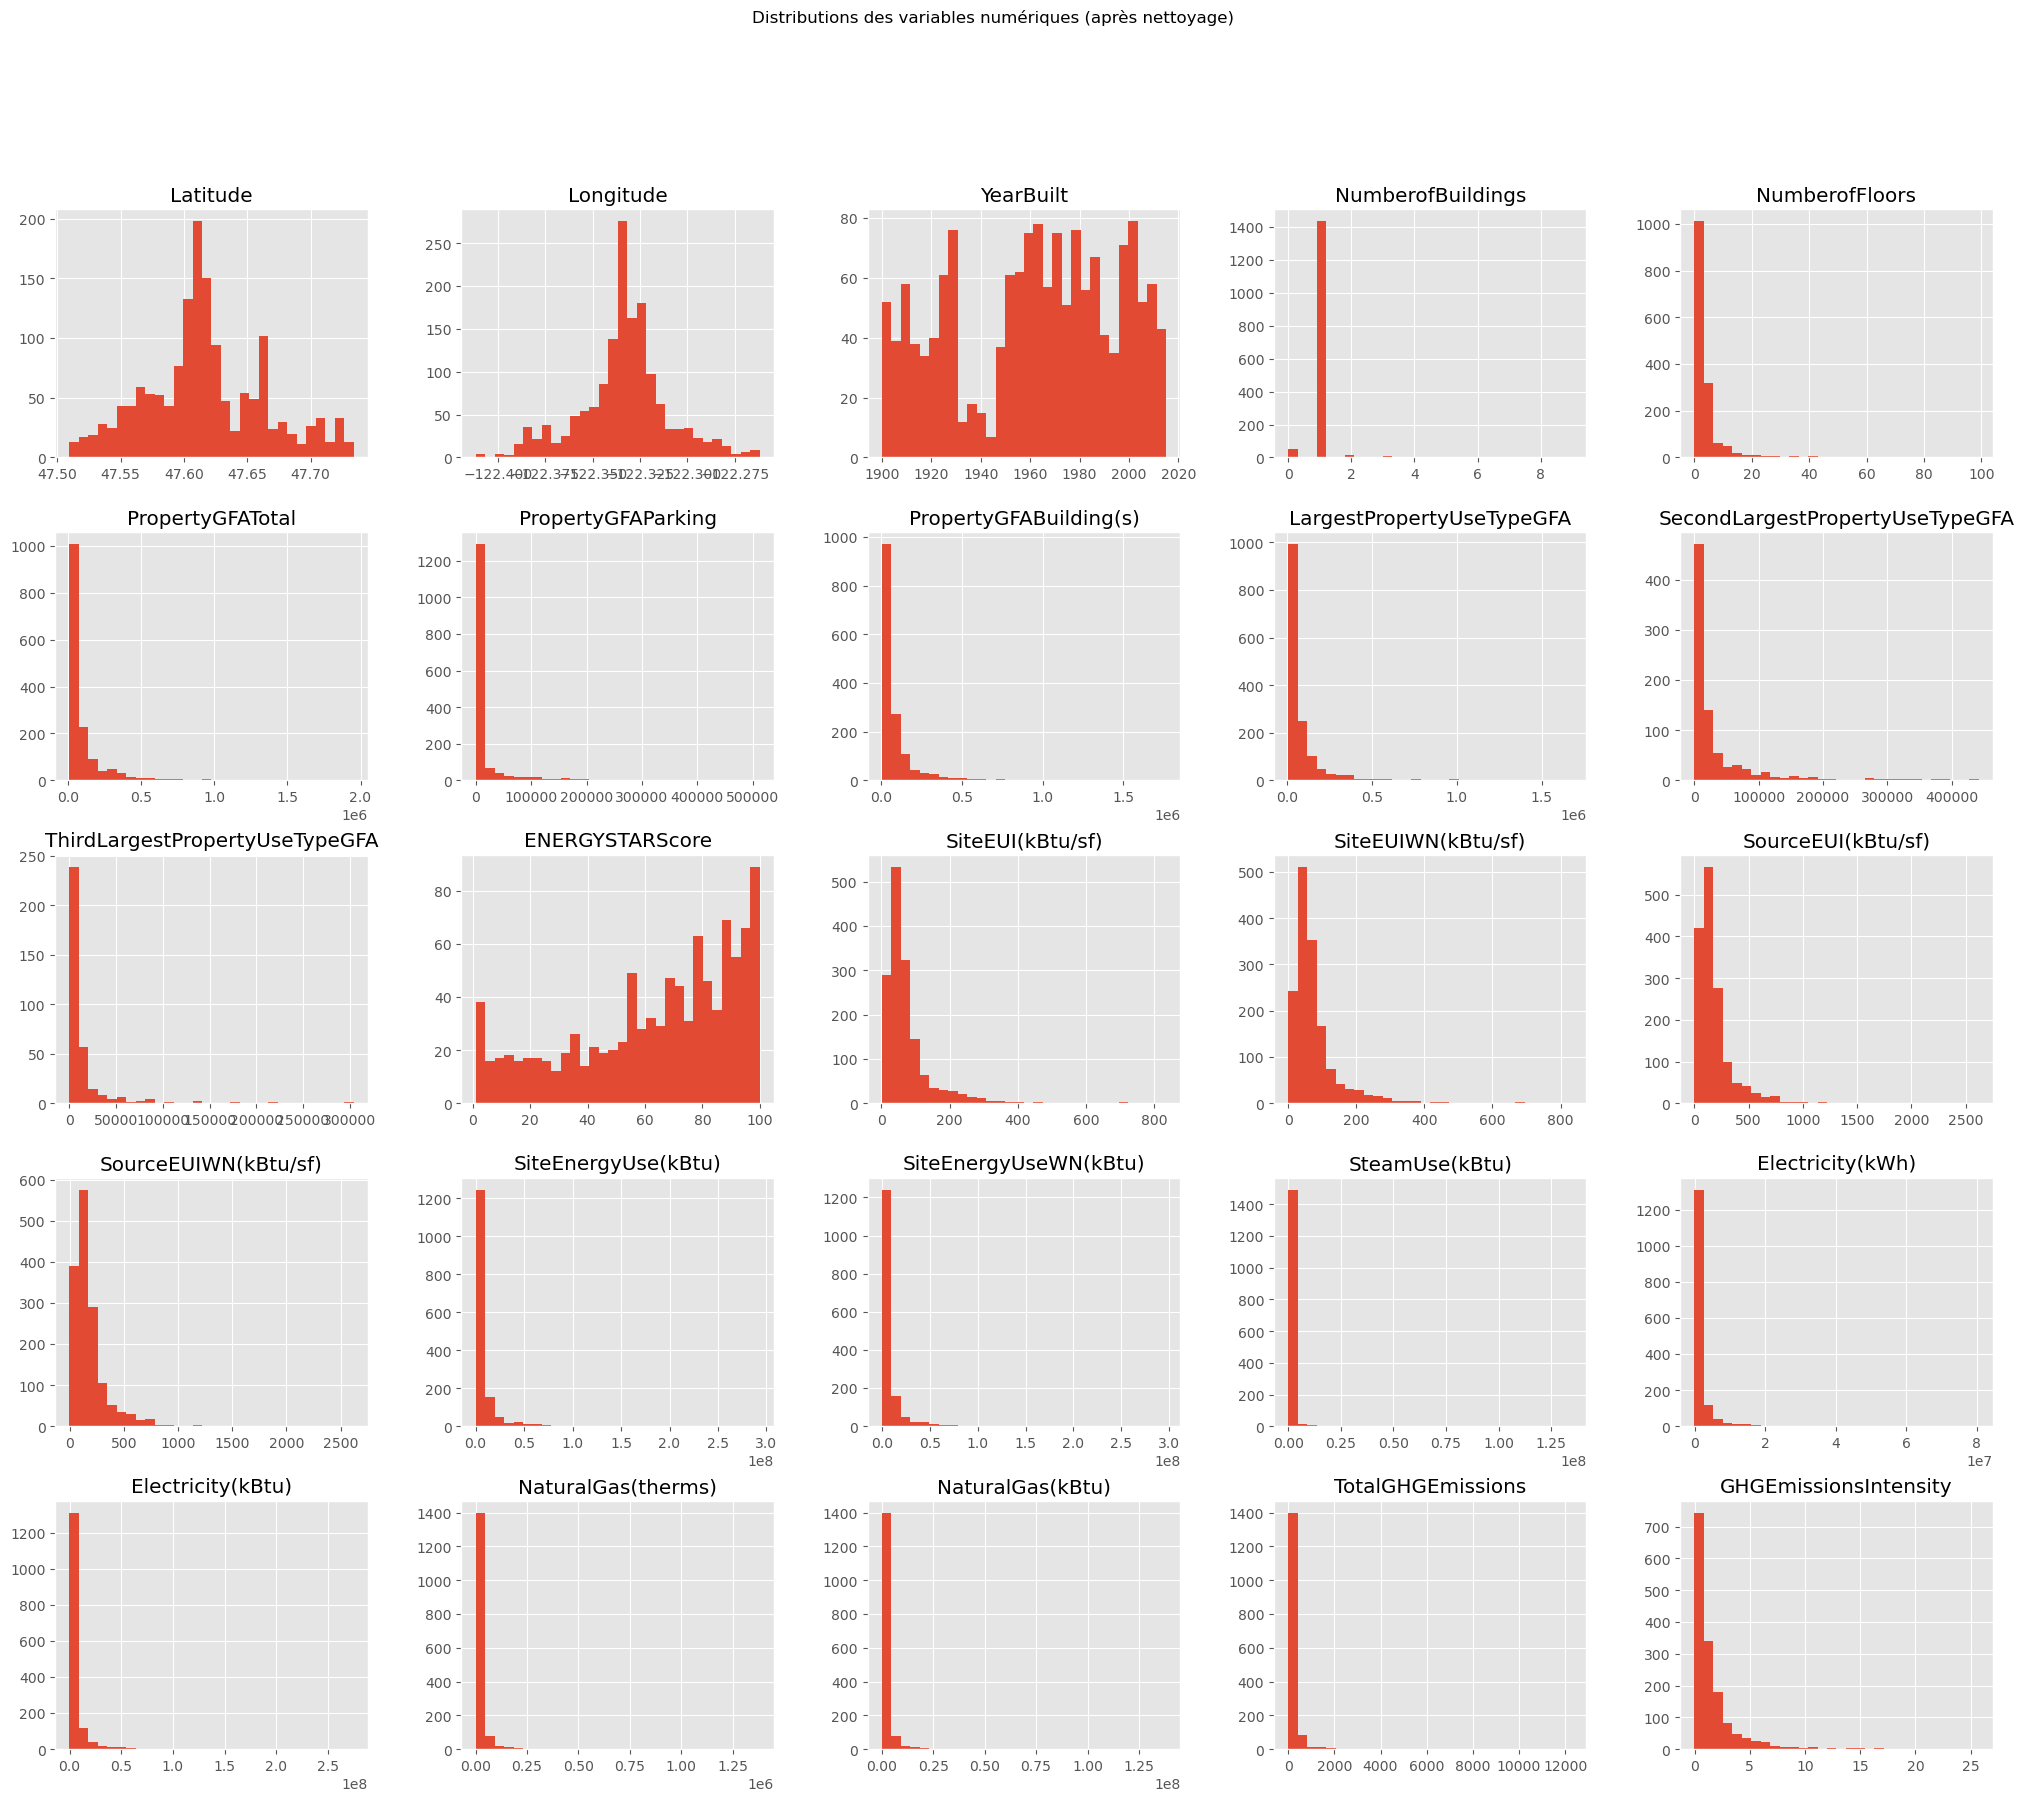

In [109]:
data_compliant.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(25, 20))
plt.suptitle("Distributions des variables numériques (après nettoyage)")
plt.show()

Distributions fortement asymétriques : 
- La majorité des graphiques montrent des distributions asymétriques vers la droite (skewness positive), ce qui indique que beaucoup de valeurs sont faibles, avec quelques valeurs très élevées (outliers potentiels).
- Certaines variables, comme SourceEUIWN(kBtu/sf) ou Electricity(kWh), présentent des valeurs très élevées par rapport à la majorité des observations.
- Ces outliers peuvent nécessiter une analyse plus approfondie pour comprendre s'ils sont plausibles ou résultent d'erreurs.
- La majorité des observations se situent dans une petite plage de valeurs (à gauche de chaque graphique), suggérant que beaucoup de bâtiments ou entités consomment relativement peu d'énergie ou produisent peu d'émissions.

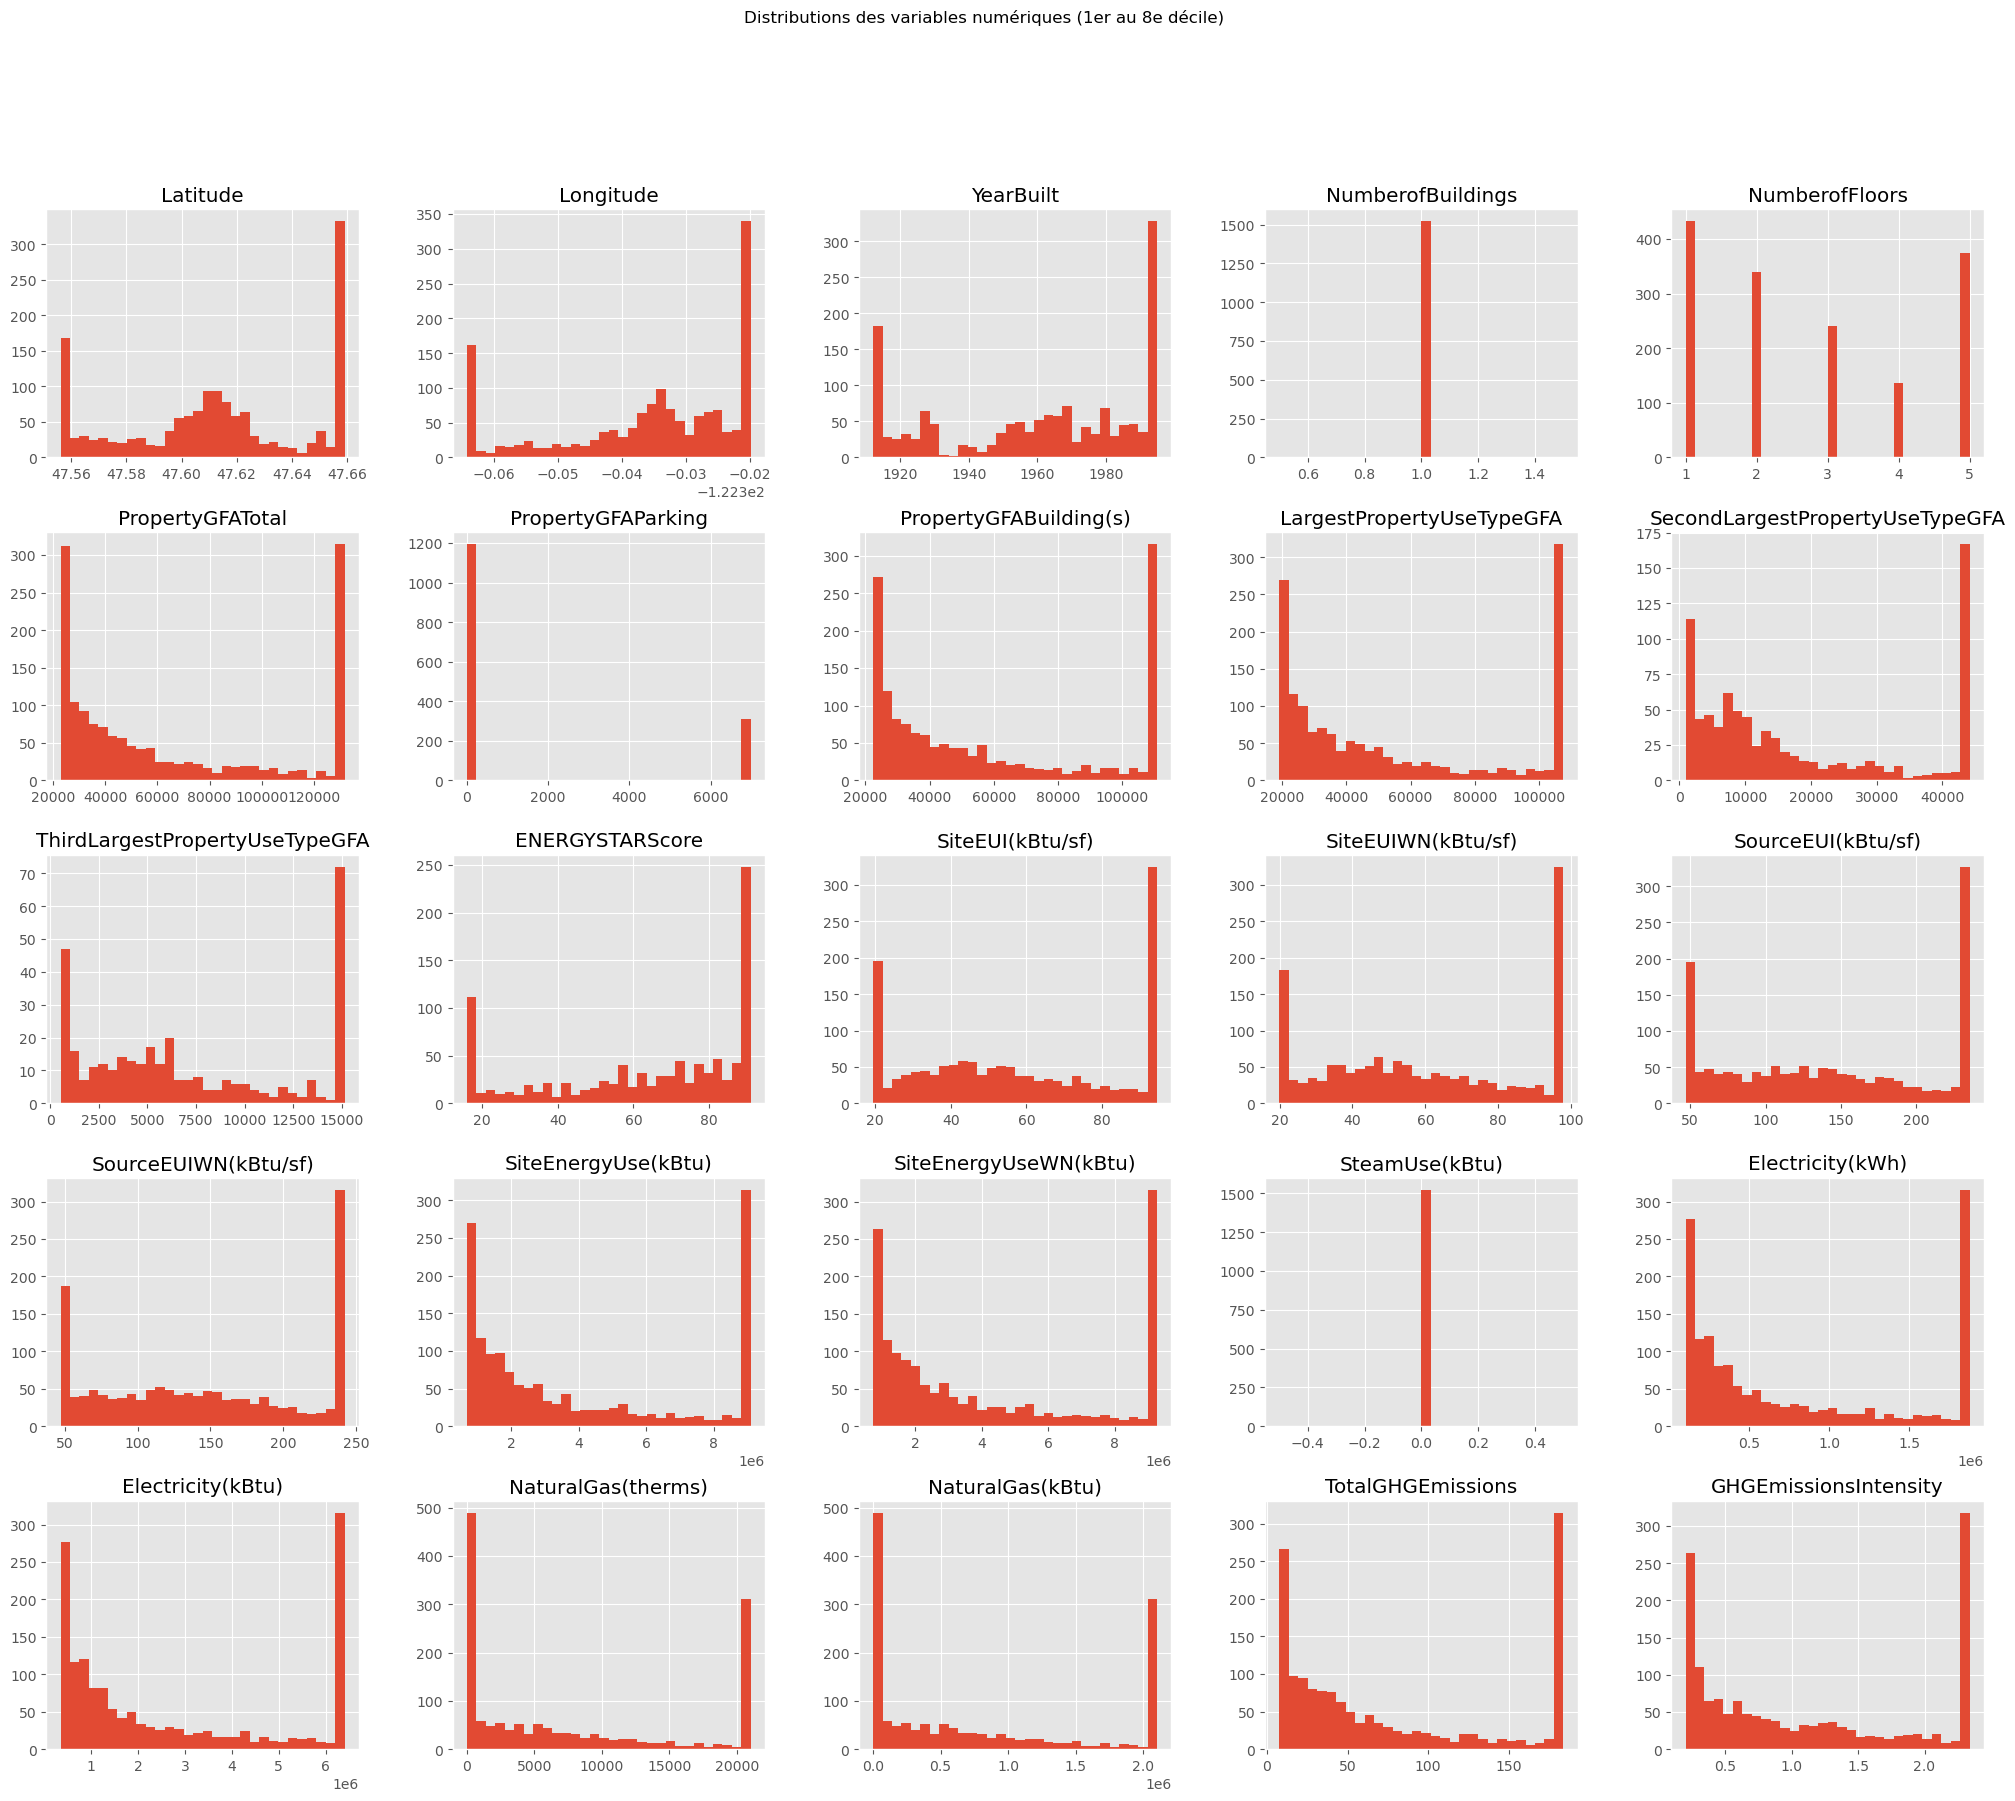

In [110]:
# Définir les limites des déciles (10% à 80%)
lower_decile = data_compliant.select_dtypes(include=['float64', 'int64']).quantile(0.1)
upper_decile = data_compliant.select_dtypes(include=['float64', 'int64']).quantile(0.8)

# Limiter les valeurs des colonnes aux déciles choisis
data_limited = data_compliant.select_dtypes(include=['float64', 'int64']).clip(lower=lower_decile, upper=upper_decile, axis=1)

# Tracer les histogrammes pour les colonnes limitées
data_limited.hist(bins=30, figsize=(25, 20))
plt.suptitle("Distributions des variables numériques (1er au 8e décile)")
plt.show()

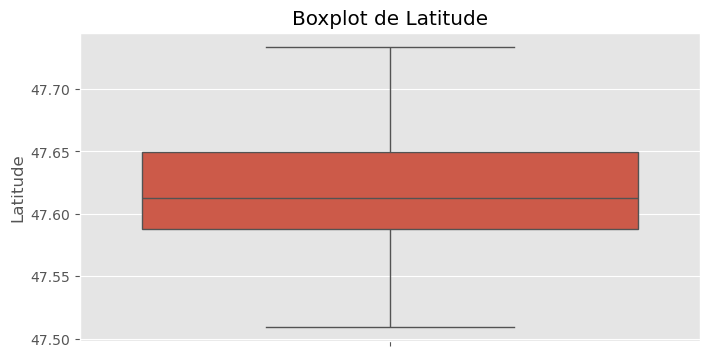

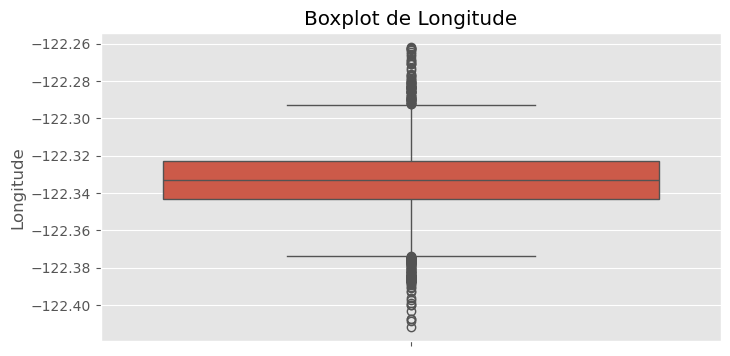

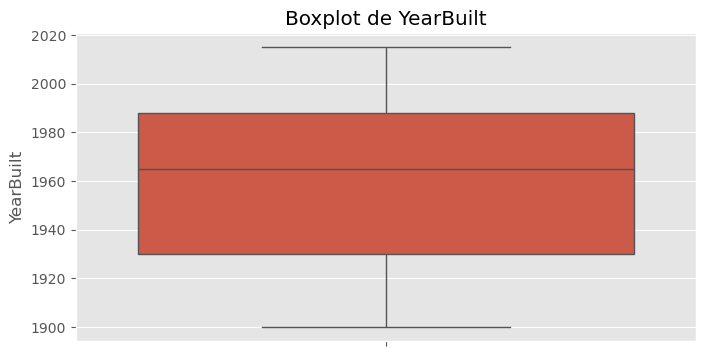

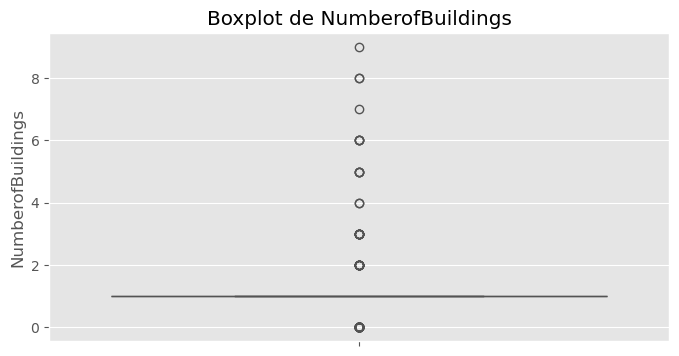

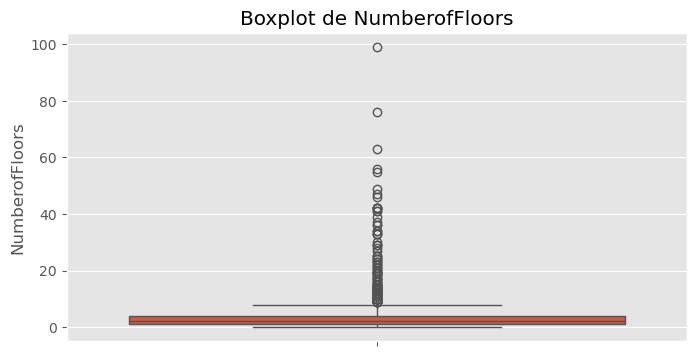

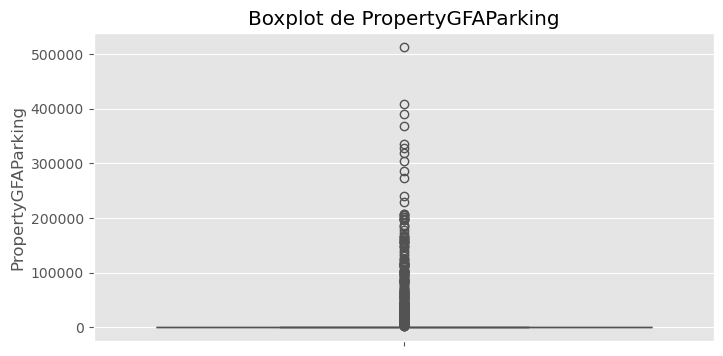

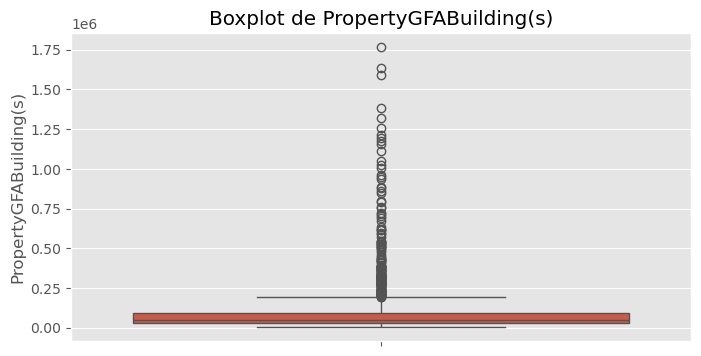

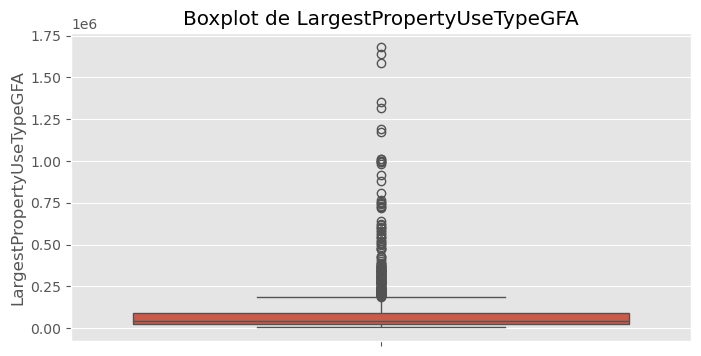

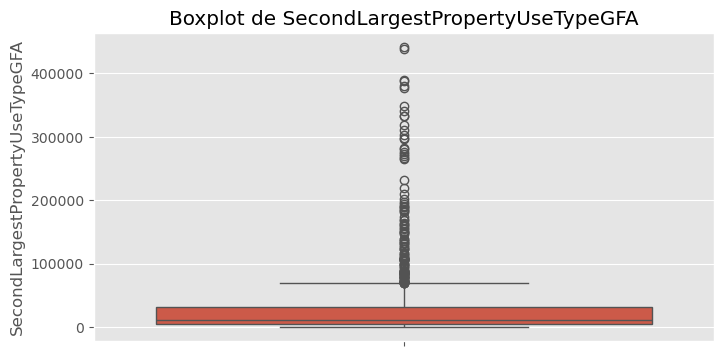

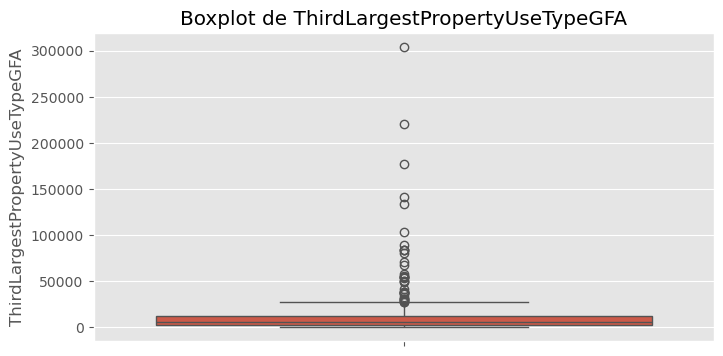

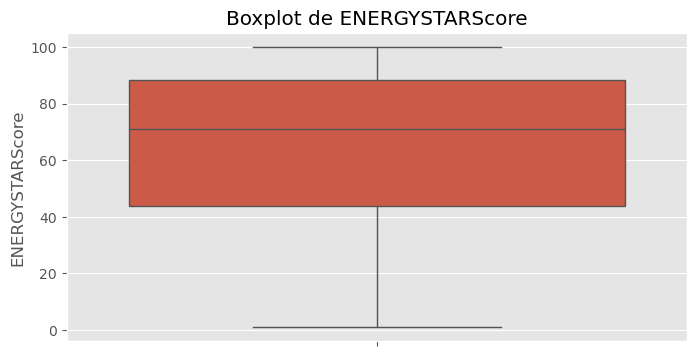

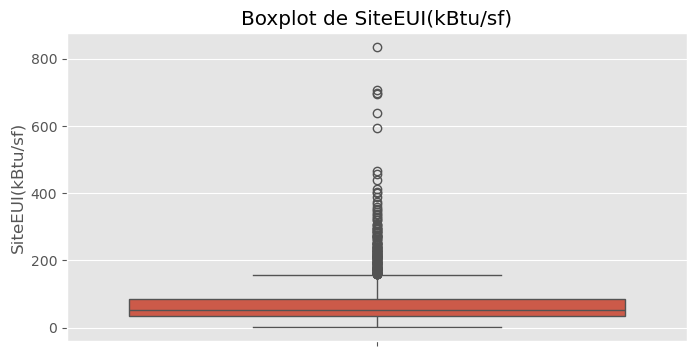

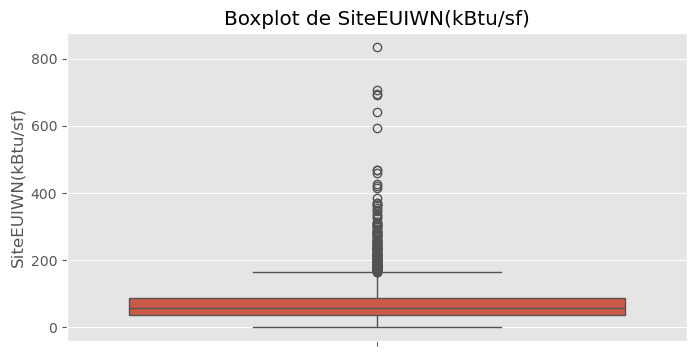

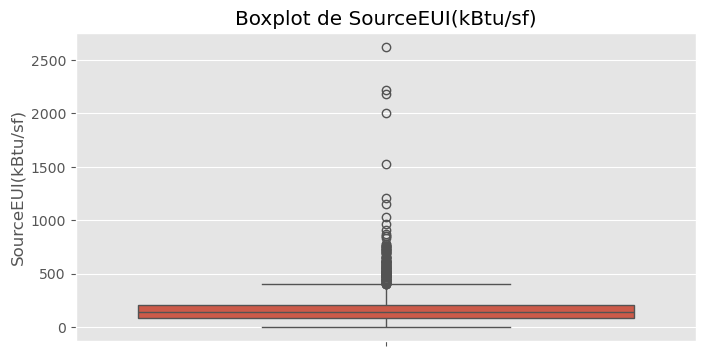

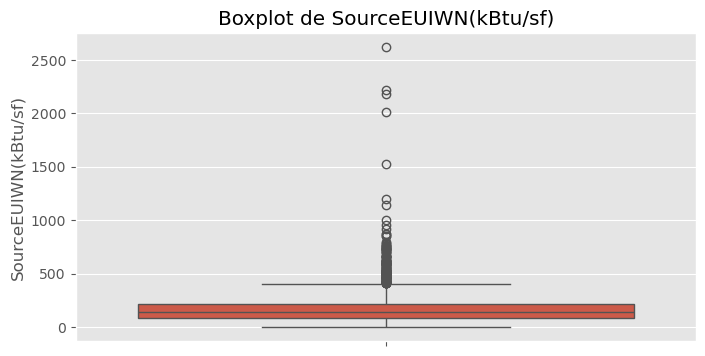

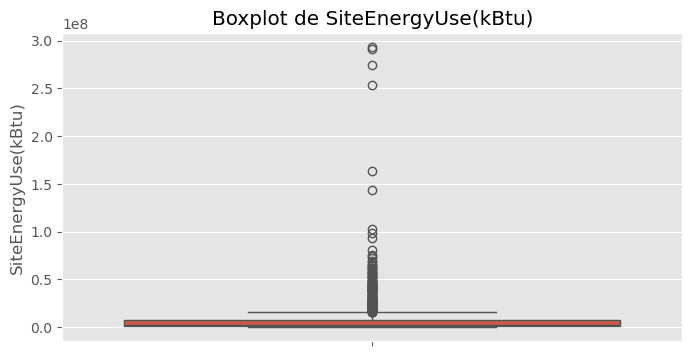

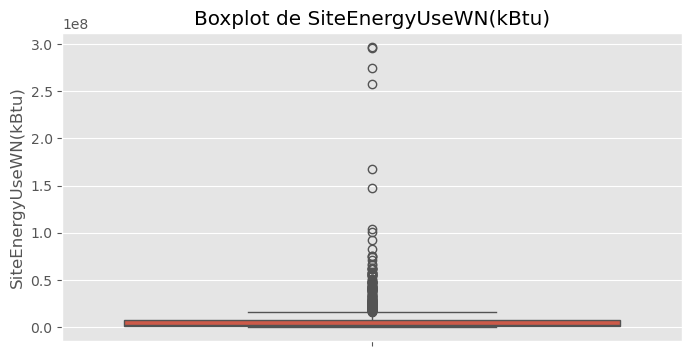

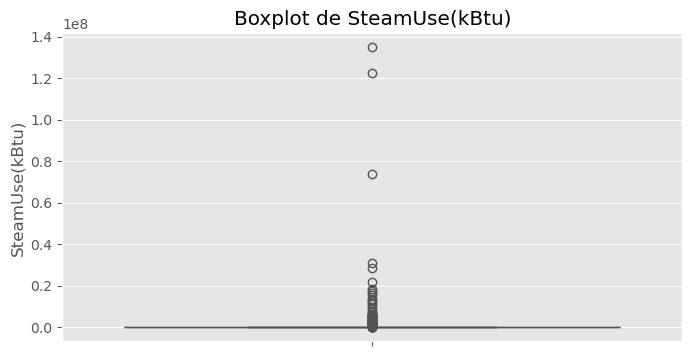

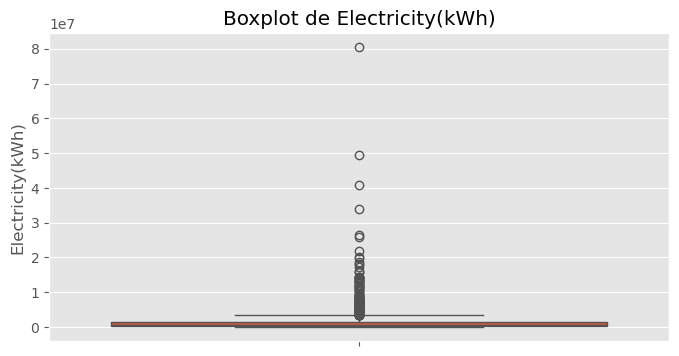

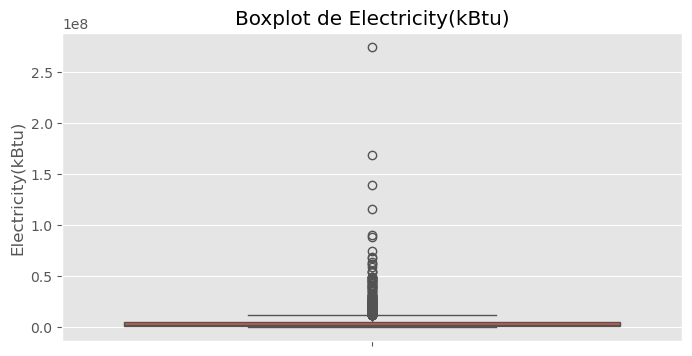

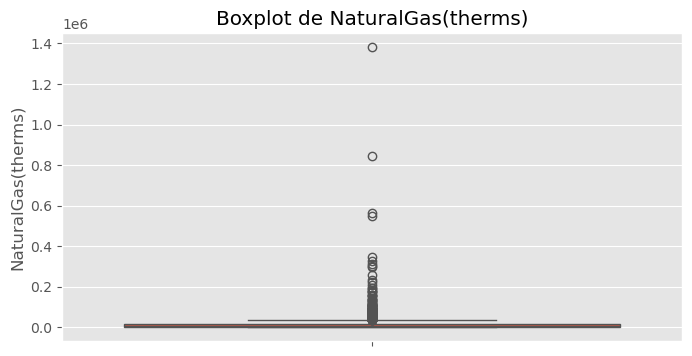

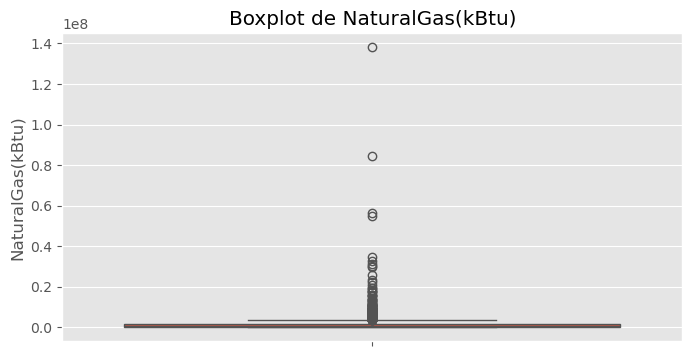

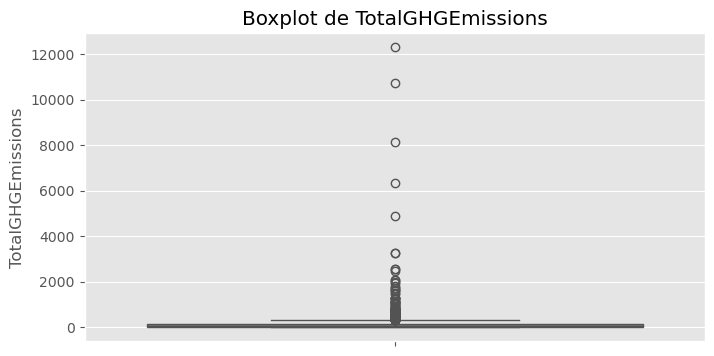

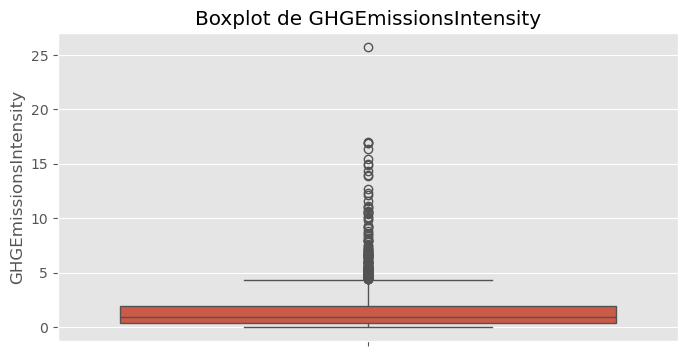

In [111]:
numerical_columns = data_compliant.select_dtypes(include=['float64', 'int64']).columns

# Création des boxplots pour chaque colonne numérique
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data_compliant[column])
    plt.title(f"Boxplot de {column}")
    plt.show()

In [112]:
data_compliant['Neighborhood'].value_counts()

Neighborhood
DOWNTOWN                  345
GREATER DUWAMISH          322
LAKE UNION                142
MAGNOLIA / QUEEN ANNE     142
NORTHEAST                 115
EAST                      114
NORTHWEST                  73
BALLARD                    58
NORTH                      51
CENTRAL                    40
DELRIDGE                   34
SOUTHWEST                  31
SOUTHEAST                  31
North                       8
Ballard                     5
Delridge                    4
Northwest                   4
Central                     4
DELRIDGE NEIGHBORHOODS      1
Name: count, dtype: int64

In [113]:
# Conversion des noms en majuscules
data_compliant['Neighborhood'] = data_compliant['Neighborhood'].str.upper()
# Suppression de "NEIGHBORHOODS"
data_compliant['Neighborhood'] = data_compliant['Neighborhood'].str.replace(" NEIGHBORHOODS", "", regex=False)
# Vérification des résultats uniques
print(data_compliant['Neighborhood'].value_counts())

Neighborhood
DOWNTOWN                 345
GREATER DUWAMISH         322
LAKE UNION               142
MAGNOLIA / QUEEN ANNE    142
NORTHEAST                115
EAST                     114
NORTHWEST                 77
BALLARD                   63
NORTH                     59
CENTRAL                   44
DELRIDGE                  39
SOUTHWEST                 31
SOUTHEAST                 31
Name: count, dtype: int64


In [114]:
(data_compliant['SiteEnergyUseWN(kBtu)']<=0).sum()

8

In [115]:
data_compliant.drop(index = data_compliant[data_compliant['SiteEnergyUseWN(kBtu)']<=0].index, inplace=True)

In [116]:
data_compliant.shape

(1516, 31)

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Sélectionner les colonnes numériques
numerical_columns = data_compliant.select_dtypes(include=['float64', 'int64']).columns
# Normaliser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_compliant[numerical_columns])
# Appliquer KNNImputer sur les données normalisées
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed = knn_imputer.fit_transform(data_scaled)
# Inverser la normalisation
data_original_scale = scaler.inverse_transform(data_imputed)
# Remettre les données à jour dans le DataFrame
data_compliant[numerical_columns] = data_original_scale
# Vérification
print(data_compliant[numerical_columns].isnull().sum())

Latitude                           0
Longitude                          0
YearBuilt                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
ENERGYSTARScore                    0
SiteEUI(kBtu/sf)                   0
SiteEUIWN(kBtu/sf)                 0
SourceEUI(kBtu/sf)                 0
SourceEUIWN(kBtu/sf)               0
SiteEnergyUse(kBtu)                0
SiteEnergyUseWN(kBtu)              0
SteamUse(kBtu)                     0
Electricity(kWh)                   0
Electricity(kBtu)                  0
NaturalGas(therms)                 0
NaturalGas(kBtu)                   0
TotalGHGEmissions                  0
GHGEmissionsIntensity              0
dtype: int64


In [119]:
# Remplir les valeurs manquantes par "Other"
data_compliant['LargestPropertyUseType'] = data_compliant['LargestPropertyUseType'].fillna('Other')
data_compliant['SecondLargestPropertyUseType'] = data_compliant['SecondLargestPropertyUseType'].fillna('Other')
data_compliant['ThirdLargestPropertyUseType'] = data_compliant['ThirdLargestPropertyUseType'].fillna('Other')

# Vérification pour confirmer qu'il n'y a plus de valeurs manquantes
print(data_compliant[['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']].isna().sum())

LargestPropertyUseType          0
SecondLargestPropertyUseType    0
ThirdLargestPropertyUseType     0
dtype: int64


In [120]:
# Remplir les colonnes catégoriques avec "Others"
categorical_columns = data_compliant.select_dtypes(include=['object']).columns
data_compliant[categorical_columns] = data_compliant[categorical_columns].fillna("Others")

In [121]:
# Remplacer les valeurs égales à 0 par 1
data_compliant['NumberofFloors'] = data_compliant['NumberofFloors'].replace(0, 1)

In [122]:
# Proportion de parking sur la surface totale
data_compliant['ParkingProportion'] = data_compliant['PropertyGFAParking'] / (data_compliant['PropertyGFABuilding(s)'] + data_compliant['PropertyGFAParking'])
# Densité énergétique
data_compliant['EnergyDensity'] = data_compliant['SiteEnergyUseWN(kBtu)'] / data_compliant['PropertyGFABuilding(s)']
# Proportion d'électricité sur la surface totale
data_compliant['ElectricityPerTotalGFA'] = data_compliant['Electricity(kBtu)'] / data_compliant['PropertyGFATotal']
# Proportion de gaz sur la surface totale
data_compliant['NaturalGasPerTotalGFA'] = data_compliant['NaturalGas(kBtu)'] / data_compliant['PropertyGFATotal']


data_compliant[['ParkingProportion', 'EnergyDensity', 'ElectricityPerTotalGFA', 'NaturalGasPerTotalGFA', ]].head()

ParkingProportion  EnergyDensity  ElectricityPerTotalGFA  \
0           0.000000      84.321754               44.621152   
1           0.145453      97.901505               31.311927   
2           0.205748      97.363565               51.800174   
3           0.000000     113.287679               45.155316   
4           0.353115     129.041231               30.576415   

   NaturalGasPerTotalGFA  
0              14.433962  
1              49.679258  
2               1.562373  
3              29.537068  
4              50.142374

In [123]:
    # Création de sous groupes
category_mapping = {
    'Automobile Dealership': 'Magasin', ##
    'Convenience Store without Gas Station': 'Magasin', ##
    'Enclosed Mall': 'Magasin', ##
    'Other - Mall': 'Magasin', ##
    'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Magasin', ##
    'Retail Store': 'Magasin', ##
    'Strip Mall': 'Magasin', ##
    'Supermarket / Grocery Store': 'Magasin', 
    'Supermarket/Grocery Store': 'Magasin', ##
    'Wholesale Club/Supercenter': 'Magasin', ##

                
    'Bar/Nightclub': 'Loisir', ##
    'Fast Food Restaurant': 'Loisir', ##
    'Fitness Center/Health Club/Gym': 'Loisir', ##
    'Food Sales': 'Loisir', ##
    'Food Service': 'Loisir', ##
    'Lifestyle Center': 'Loisir', ##
    'Movie Theater': 'Loisir', ##
    'Museum': 'Loisir', ##
    'Other - Entertainment/Public Assembly': 'Loisir', ##
    'Other - Recreation': 'Loisir', ##
    'Other - Restaurant/Bar': 'Loisir', ##
    'Performing Arts': 'Loisir', ##
    'Restaurant': 'Loisir', ##
    'Social/Meeting Hall': 'Loisir', ##
    'Swimming Pool': 'Loisir', ##
    'Worship Facility': 'Loisir', ##
        
                
    'Hotel': 'Logement', ##
    'Low-Rise Multifamily': 'Logement',##
    'Mixed Use Property': 'Logement', ##
    'Multifamily Housing': 'Logement', ##
    'Other - Lodging/Residential': 'Logement', ##
    'Prison/Incarceration': 'Logement', ##
    'Residence Hall': 'Logement', ##
    'Residence Hall/Dormitory': 'Logement', ##
    'Residential Care Facility': 'Logement', ##
    'Senior Care Community': 'Logement', ##
                
    
    'Hospital': 'Sante', ##
    'Hospital (General Medical & Surgical)': 'Sante', ##
    'Laboratory': 'Sante', ##
    'Medical Office': 'Sante', ##
    'Other/Specialty Hospital': 'Sante', ##
    'Urgent Care/Clinic/Other Outpatient': 'Sante', ##
        
    'Bank Branch': 'Bureaux', ##
    'Courthouse': 'Bureaux', ##
    'Financial Office': 'Bureaux', ##
    'Large Office': 'Bureaux', ##
    'Office': 'Bureaux', ##
    'Other - Public Services': 'Bureaux', ##
    'Other - Services': 'Bureaux', ##
    'Police Station': 'Bureaux', ##
    'Small- and Mid-Sized Office': 'Bureaux', ##

    'Adult Education': 'Ecole', ##
    'College/University': 'Ecole', ##
    'Education' : 'Ecole',
    'K-12 School': 'Ecole', ##
    'Library': 'Ecole', ##
    'Other - Education': 'Ecole', ##
    'Pre-school/Daycare': 'Ecole', ##
    'University': 'Ecole',##
    'Vocational School': 'Ecole', ##
        
    'Data Center': 'Others', ##
    'Distribution Center': 'Others', ##
    'Fire Station': 'Others', ##
    'Manufacturing/Industrial Plant': 'Others', ##
    'Warehouse' : 'Others', ##
    'Non-Refrigerated Warehouse': 'Others', ##
    'Other': 'Others',##
    'Other - Technology/Science': 'Others', ##
    'Other - Utility': 'Others', ##
    'Parking': 'Others', ##
    'Repair Services (Vehicle, Shoe, Locksmith, etc)': 'Others', ##
    'Refrigerated Warehouse': 'Others', ##
    'Self-Storage Facility': 'Others' ##
               }
    


In [125]:
# Liste des colonnes à remplacer
columns_to_replace = [
    'PrimaryPropertyType', 
    'SecondLargestPropertyUseType', 
    'LargestPropertyUseType', 
    'ThirdLargestPropertyUseType'
]

# Remplacement des valeurs avec le dictionnaire
for col in columns_to_replace:  
    data_compliant[col] = data_compliant[col].replace(category_mapping) 

In [149]:
data_compliant['LargestPropertyUseType'].nunique()

7

In [151]:
data_compliant = pd.get_dummies(data_compliant, columns=['BuildingType',
                                                         'PrimaryPropertyType', 
                                                         'LargestPropertyUseType',
                                                         'SecondLargestPropertyUseType',
                                                         'ThirdLargestPropertyUseType',
                                                         'Neighborhood']
                                , drop_first=True)

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sélectionner uniquement les colonnes numériques
X = data_compliant.select_dtypes(include=[np.number])

# Calculer le VIF pour chaque colonne
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Afficher les résultats
print(vif_data)

                           features           VIF
0                          Latitude  1.083913e+06
1                         Longitude  1.078488e+06
2                         YearBuilt  4.449753e+03
3                 NumberofBuildings  6.254105e+00
4                    NumberofFloors  3.083948e+00
5                  PropertyGFATotal           inf
6                PropertyGFAParking           inf
7            PropertyGFABuilding(s)           inf
8         LargestPropertyUseTypeGFA  2.672080e+01
9   SecondLargestPropertyUseTypeGFA  4.968689e+00
10   ThirdLargestPropertyUseTypeGFA  3.588374e+00
11                  ENERGYSTARScore  8.789653e+00
12                 SiteEUI(kBtu/sf)  3.468836e+03
13               SiteEUIWN(kBtu/sf)  3.235124e+03
14               SourceEUI(kBtu/sf)  4.686693e+03
15             SourceEUIWN(kBtu/sf)  4.434788e+03
16              SiteEnergyUse(kBtu)  6.497842e+03
17            SiteEnergyUseWN(kBtu)  3.737369e+03
18                   SteamUse(kBtu)  2.040501e+10


C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Nous utilisons ici un VIF (Variance Inflation Factor) afin de détecter d'éventuelles corrélations entre nos features.

In [155]:
data_compliant = data_compliant.drop(columns=[
            'Electricity(kWh)',
            'NaturalGas(therms)',
            'PropertyGFATotal',
            'SiteEUI(kBtu/sf)',
            'SourceEUI(kBtu/sf)',
            'GHGEmissionsIntensity',
            'SiteEnergyUse(kBtu)',
    'Electricity(kBtu)',
    'NaturalGas(kBtu)',
    'SteamUse(kBtu)'
    
    
])


Features qui posent problèmes à la bonne réalisation de notre problématique.

In [157]:
logsite = np.log2(1+data['SiteEnergyUseWN(kBtu)'])

Passage au log2 de SiteEnergyUseWN(kBtu) afin d'obtenir par la suite un modèle plus robuste.

In [159]:
data_compliant['SiteEnergyUseWN(kBtu)Log2'] = logsite

In [161]:
print(data_compliant.isnull().sum())

Latitude                                 0
Longitude                                0
YearBuilt                                0
NumberofBuildings                        0
NumberofFloors                           0
PropertyGFAParking                       0
PropertyGFABuilding(s)                   0
LargestPropertyUseTypeGFA                0
SecondLargestPropertyUseTypeGFA          0
ThirdLargestPropertyUseTypeGFA           0
ENERGYSTARScore                          0
SiteEUIWN(kBtu/sf)                       0
SourceEUIWN(kBtu/sf)                     0
SiteEnergyUseWN(kBtu)                    0
TotalGHGEmissions                        0
ParkingProportion                        0
EnergyDensity                            0
ElectricityPerTotalGFA                   0
NaturalGasPerTotalGFA                    0
BuildingType_Nonresidential COS          0
BuildingType_Nonresidential WA           0
BuildingType_SPS-District K-12           0
PrimaryPropertyType_Ecole                0
PrimaryProp

In [163]:
# Supprimer les lignes où 'SiteEnergyUseWN(kBtu)Log2' contient des NaN
data_compliant = data_compliant.dropna(subset=['SiteEnergyUseWN(kBtu)Log2'])

# Vérification
print(data_compliant['SiteEnergyUseWN(kBtu)Log2'].isnull().sum())

0


In [165]:
data_compliant.shape

(1515, 59)

In [167]:
data_compliant = data_compliant.drop(columns=['SiteEnergyUseWN(kBtu)'])

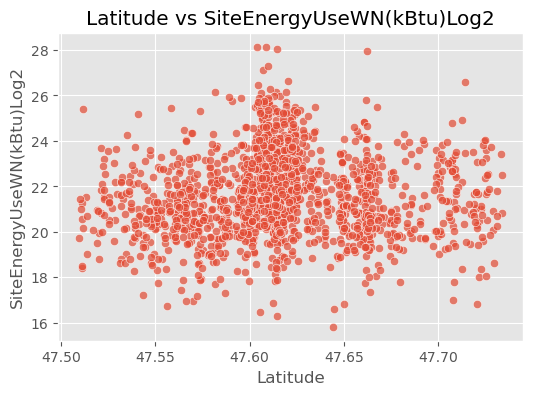

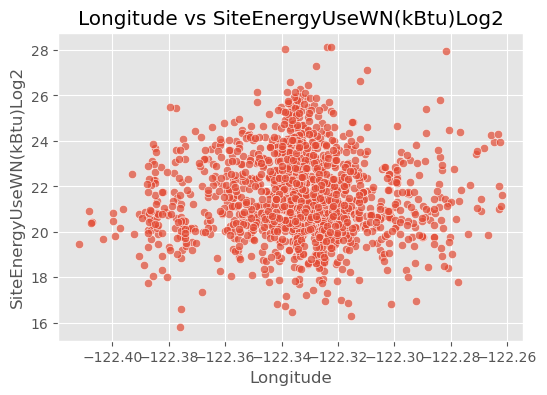

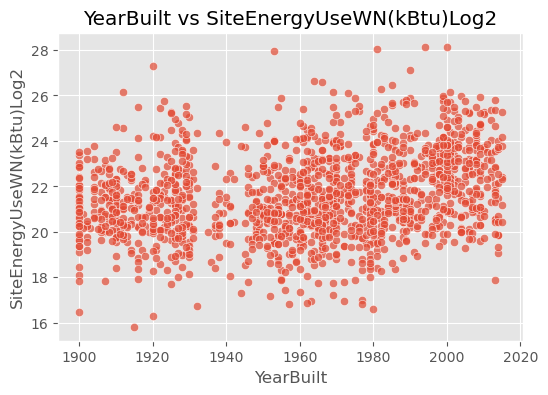

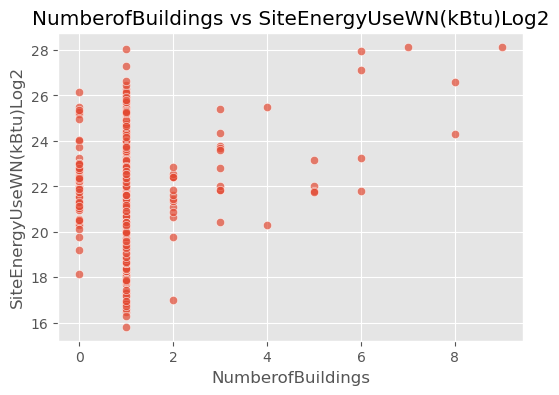

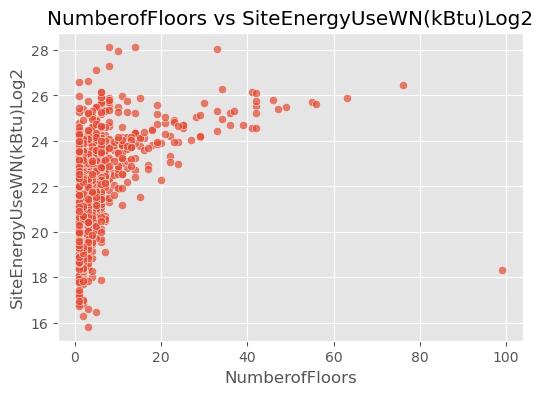

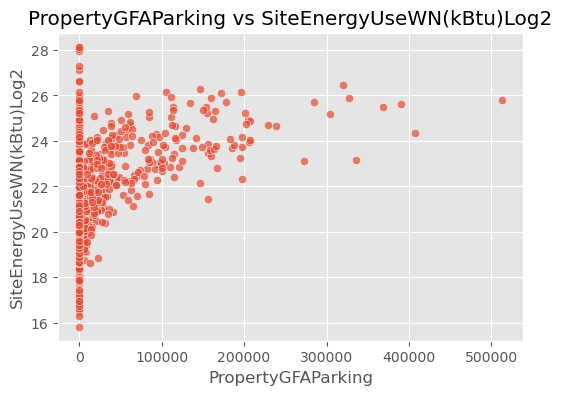

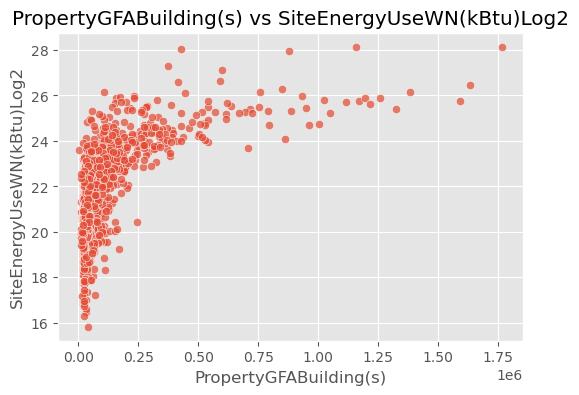

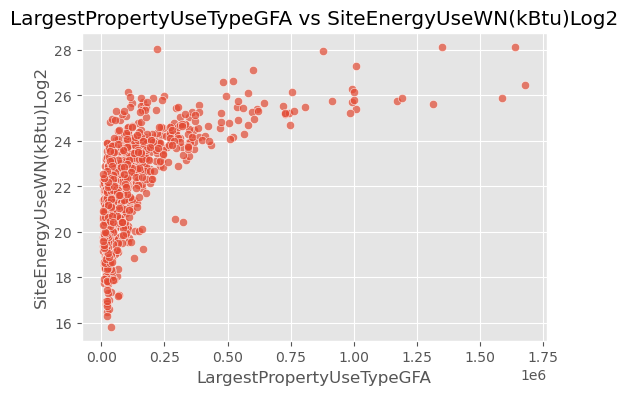

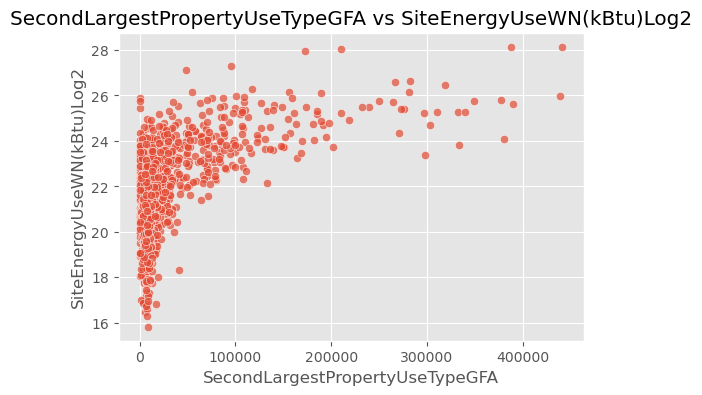

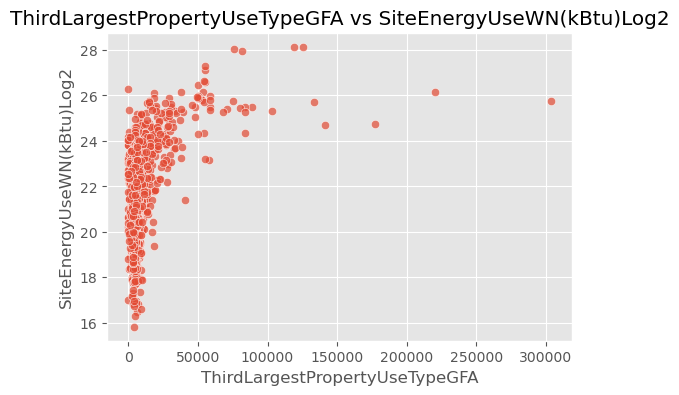

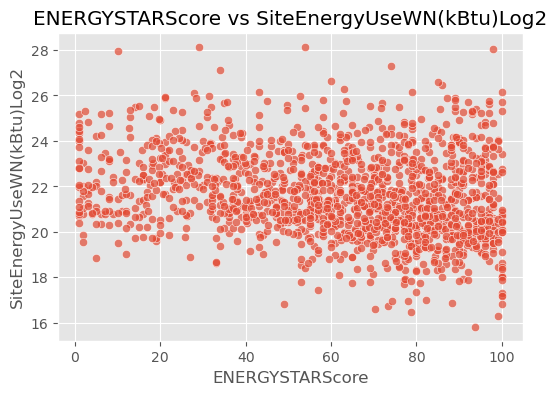

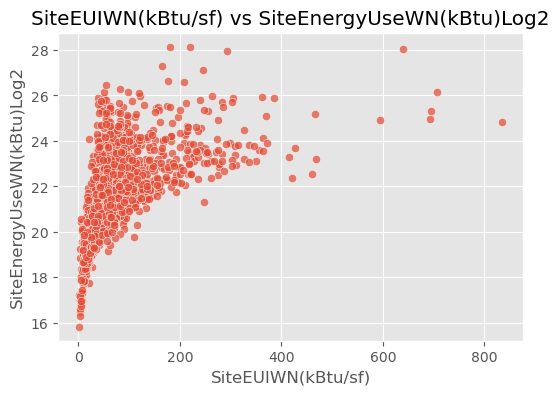

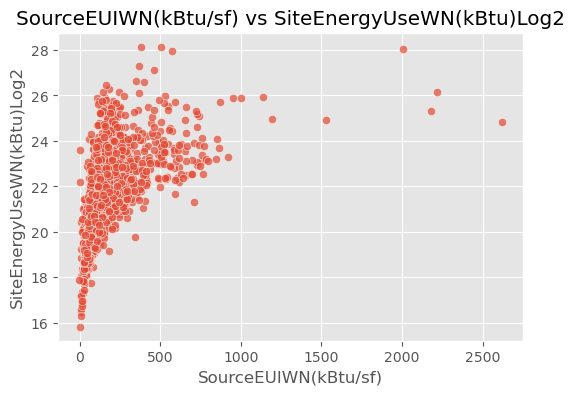

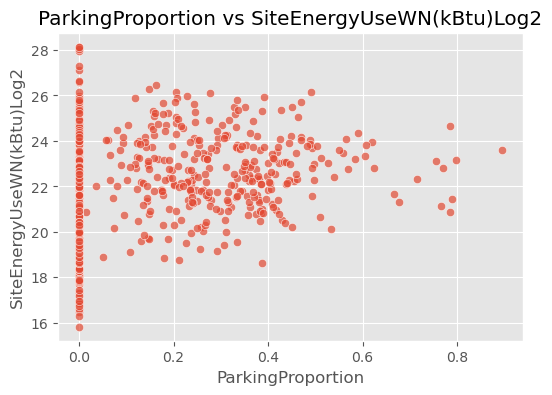

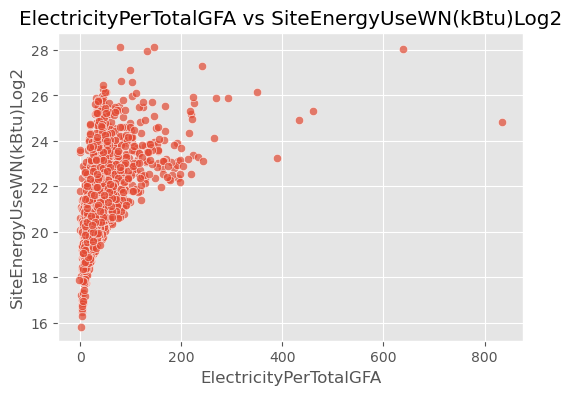

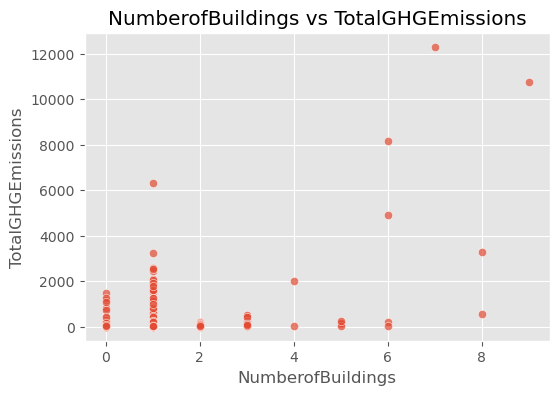

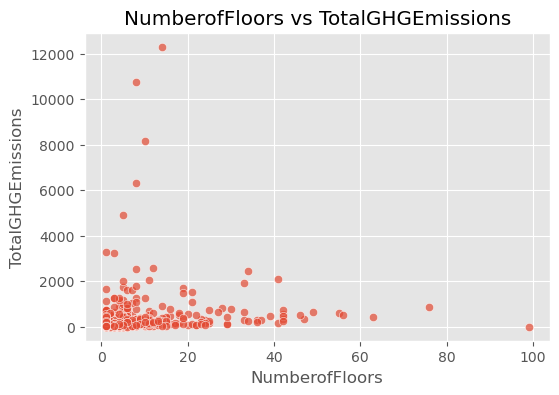

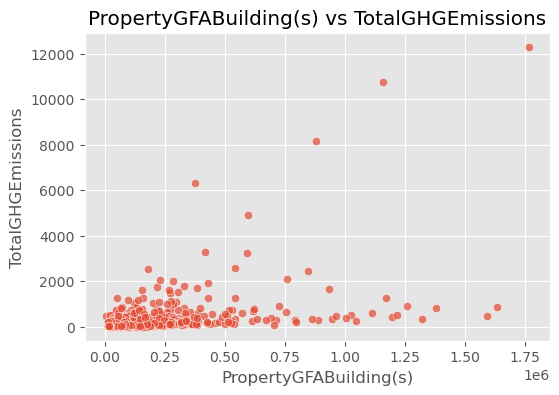

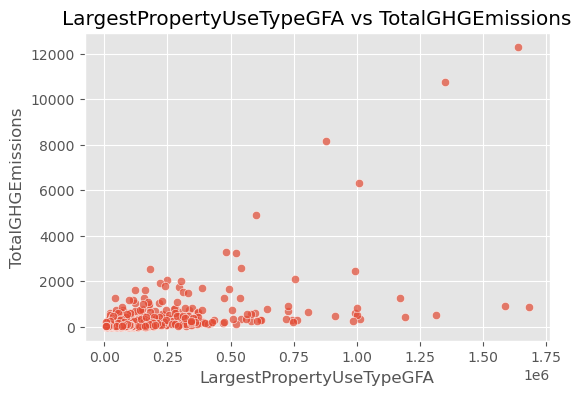

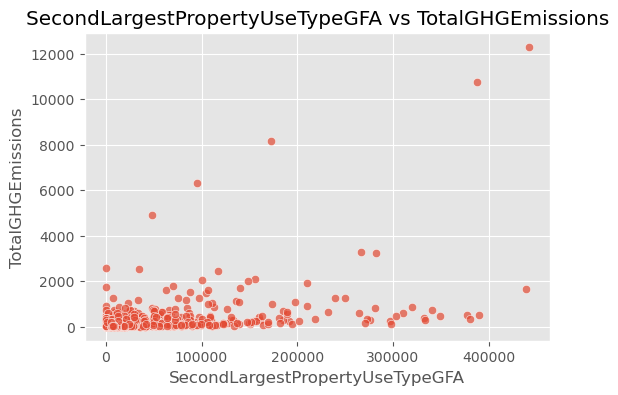

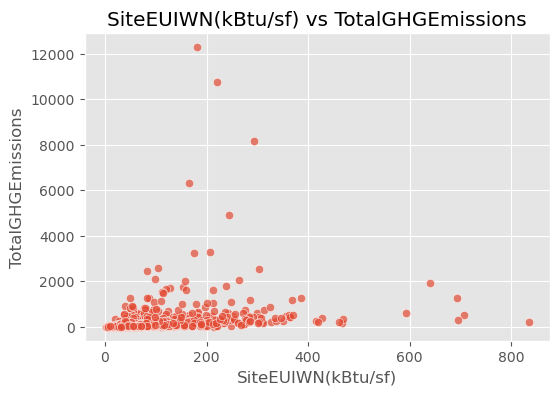

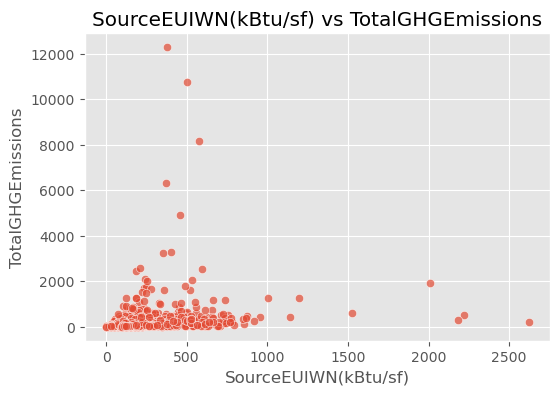

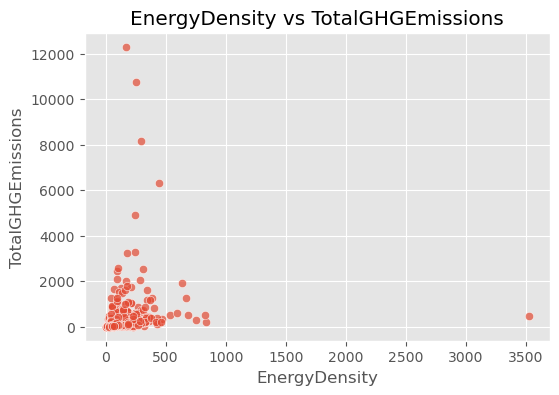

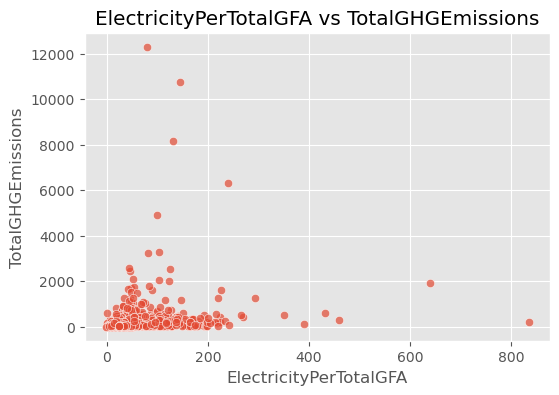

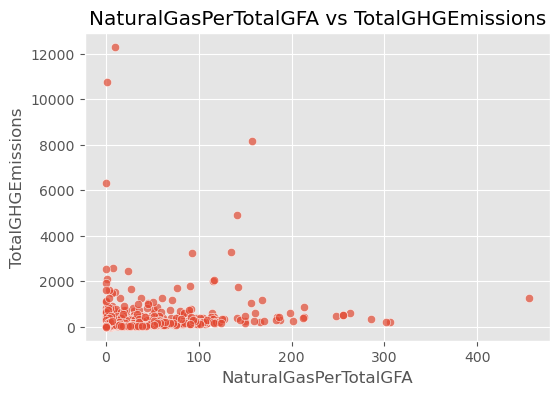

In [169]:
cibles = ['SiteEnergyUseWN(kBtu)Log2', 'TotalGHGEmissions']
features_numeriques = data_compliant.select_dtypes(include='number').columns.drop(cibles)

for cible in cibles:
    for feature in features_numeriques:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=data_compliant[feature], y=data_compliant[cible], alpha=0.7)
        plt.title(f'{feature} vs {cible}')
        plt.xlabel(feature)
        plt.ylabel(cible)
        plt.show()

In [321]:
numerical_data = data_compliant.select_dtypes(include='float')

# Calcul de la matrice de corrélation
correlation_matrix_numeric = numerical_data.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation (Variables Numériques)')
plt.show()

La matrice de corrélation apporte une information très interessantes : ENERGYSTARScore agit négativement sur nos 2 variables cibles.

In [322]:
#Exporter les données restantes :
data_compliant.to_csv('data_nettoyer_test2.csv', index=False)